# Лабораторна робота №1 з методів числення


Спочатку створюємо допоміжні функції

func, що визначає подану функцію 0.5^(2*x+1)

In [56]:
library(stringr)
library(Deriv)

func <- function (x){
  return (0.5^(2*x+1))
}

concL, що допомагає вивести аналітичний вигляд многочлену Лагранджа

In [57]:
concL <- function (i,j, xs){
  if (i!=j){
    return (paste("(( x - ",xs[j],")/(", xs[i],"-",xs[j],"))"))
  }
  else{
    return (1)
  }
}

funsL та Lagr, що допомагають при обчисленні значення многочлену Лагранджа у поданих точках

In [58]:
funsL <- function (x,i,j,xs){
  if (i!=j){
    return ((( x - xs[j])/(xs[i] - xs[j])))
  }
  else{
    return (1)
  }
}

Lagr <- function(x,xs=seq(1,5,by=1)){
  return (sum(sapply(1:n, function(i) ys[i]*(prod(sapply(1:n, function(j)  funsL(x,i,j,xs)))))))
}


concN та funsN, що допомагають при виведенні та обчисленні многочлену Ньютона

In [95]:
concN <- function(n,y){
  seq <- paste(sapply(2:n, function (i) paste0("(t-",i-2,")",sep="")),collapse = "*")
  polin <- paste(seq, paste( y, factorial(n-1), sep = "/"),sep = "*")
  return (polin)
}

funsN <- function(n,y,x){
  t <- (x-1)/0.5
  vals <- prod(sapply(1:(n-1), function(i) (t-(i-1))))*y/factorial(n-1)
  return (vals)

}

## Спочатку визначаємо кількість точок - 5, інтервал [1,5] та крок 1. 
## Знаходимо значення многочлену Лагранджа у точках та аналітичний вид поліному Лагранджа 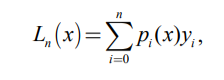
## або
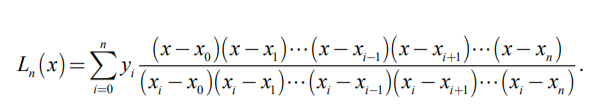

In [101]:
n<-5
xs <- seq(1,5,by=1)
ys <- sapply(xs,func)
# Значення в точках многочлена Лагранджа
lgj <- sapply(xs, function (x) Lagr(x))
cat('Values\n',lgj,'\n')

#аналітичний вираз Лагранджа
lagan <- paste(sapply(1:n, function(i) paste(ys[i],paste((sapply(1:n, function(j) concL(i,j,xs))),collapse = " * "),sep=" * ")), collapse="\n + ")
cat("\n--------------------\nLagrange polynom \n Ln(x) = ", lagan)
                                                                 
tosimp <- Simplify(lagan, env = parent.frame(), scache = new.env())
cat("\n------------------\nSimplified:\n Ln(x) = ",tosimp, "\n------------------\nGetting rid of brakets: \n Ln(x) = 0.93212890625 + 0.0263671875*x^4 + 0.925048828125*x^2 - 0.2548828125*x^3 - 1.503662109375*x")

Values
 0.125 0.03125 0.0078125 0.001953125 0.0004882812 

--------------------
Lagrange polynom 
 Ln(x) =  0.125 * 1 * (( x -  2 )/( 1 - 2 )) * (( x -  3 )/( 1 - 3 )) * (( x -  4 )/( 1 - 4 )) * (( x -  5 )/( 1 - 5 ))
 + 0.03125 * (( x -  1 )/( 2 - 1 )) * 1 * (( x -  3 )/( 2 - 3 )) * (( x -  4 )/( 2 - 4 )) * (( x -  5 )/( 2 - 5 ))
 + 0.0078125 * (( x -  1 )/( 3 - 1 )) * (( x -  2 )/( 3 - 2 )) * 1 * (( x -  4 )/( 3 - 4 )) * (( x -  5 )/( 3 - 5 ))
 + 0.001953125 * (( x -  1 )/( 4 - 1 )) * (( x -  2 )/( 4 - 2 )) * (( x -  3 )/( 4 - 3 )) * 1 * (( x -  5 )/( 4 - 5 ))
 + 0.00048828125 * (( x -  1 )/( 5 - 1 )) * (( x -  2 )/( 5 - 2 )) * (( x -  3 )/( 5 - 3 )) * (( x -  4 )/( 5 - 4 )) * 1
------------------
Simplified:
 Ln(x) =  (x - 2) * (x - 3) * (x - 4) * (x - 5)/192 
------------------
Getting rid of brakets: 
 Ln(x) = 0.93212890625 + 0.0263671875*x^4 + 0.925048828125*x^2 - 0.2548828125*x^3 - 1.503662109375*x

## Тепер обчислюємо многочлен Ньютона за такою формулою, але замість q ми вводимо t -> t= x-x0
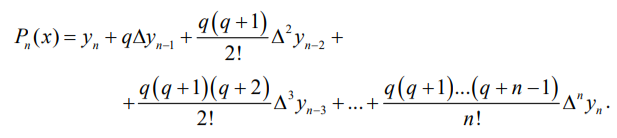
Знаходимо дельти
Задаємо кількість точок у новому інтервалі з кроком 0.5 у діапазоні від 1 до 5.5

In [102]:

#Многочлен Ньютона
delys <- sapply(1:4,function (i) ys[i+1]-ys[i])
del2ys <- sapply(1:3,function (i) delys[i+1]-delys[i])
del3ys <- sapply(1:2,function (i) del2ys[i+1]-del2ys[i])
del4ys <- del3ys[2]-del3ys[1]

fornewys <- c(ys[1],delys[1],del2ys[1],del3ys[1],del4ys)

i <- 9
hn <- 0.5
xn <- seq(1,5,hn)

# Аналітичний вираз многочлена Ньютона
newan <- paste(fornewys[1],paste(sapply(2:n, function(x) concN(x,fornewys[x])),collapse = "+"),sep = "+")
cat("\n ---------\nNewton polynom\n N(t) = ", newan, '\n Where t is x-x0, x0=1\nN(x) = ', str_replace_all(newan,"t","2*(x-1)" ))

tosimp2 <- Simplify(str_replace_all(newan,"t","x-1" ), env = parent.frame(), scache = new.env())
cat("\n------\nSimplified:\n",tosimp2, "\n------------------\nGetting rid of brakets: \n N(x) = 0.93212890625 + 0.0263671875*x^4 + 0.925048828125*x^2 - 0.2548828125*x^3 - 1.503662109375*x")

# Значення многочлена Ньютона функції у точках
newval <- sapply(xn,function(val) round(sum(fornewys[1],sapply(2:n, function(i) funsN(i,fornewys[i], val))),10))
valsy <- sapply(xn, func)
lagval <- sapply(xn, function (x) Lagr(x))

nwt <- sapply(xs,function(val) round(sum(fornewys[1],sapply(2:n, function(i) funsN(i,fornewys[i], val))),10))



 ---------
Newton polynom
 N(t) =  0.125+(t-0)*-0.09375/1+(t-0)*(t-1)*0.0703125/2+(t-0)*(t-1)*(t-2)*-0.052734375/6+(t-0)*(t-1)*(t-2)*(t-3)*0.03955078125/24 
 Where t is x-x0, x0=1
N(x) =  0.125+(2*(x-1)-0)*-0.09375/1+(2*(x-1)-0)*(2*(x-1)-1)*0.0703125/2+(2*(x-1)-0)*(2*(x-1)-1)*(2*(x-1)-2)*-0.052734375/6+(2*(x-1)-0)*(2*(x-1)-1)*(2*(x-1)-2)*(2*(x-1)-3)*0.03955078125/24
------
Simplified:
 (((0.03955078125 * (x - 4)/24 - 0.0087890625) * (x - 3) + 0.03515625) *      (x - 2) - 0.09375) * (x - 1) + 0.125 
------------------
Getting rid of brakets: 
 N(x) = 0.93212890625 + 0.0263671875*x^4 + 0.925048828125*x^2 - 0.2548828125*x^3 - 1.503662109375*x

## Виводимо тепер значення поліномів у точках з 1 до 5 та кроком 1 та графік


 ------For 5 values------
 1 2 3 4 5
 Value of function 
 0.125 0.03125 0.0078125 0.001953125 0.0004882812
 Newton value 
 0.125 0.03125 0.0078125 0.001953125 0.0004882812
 Lagrange value 
 0.125 0.03125 0.0078125 0.001953125 0.0004882812
 Building graph for 5 values

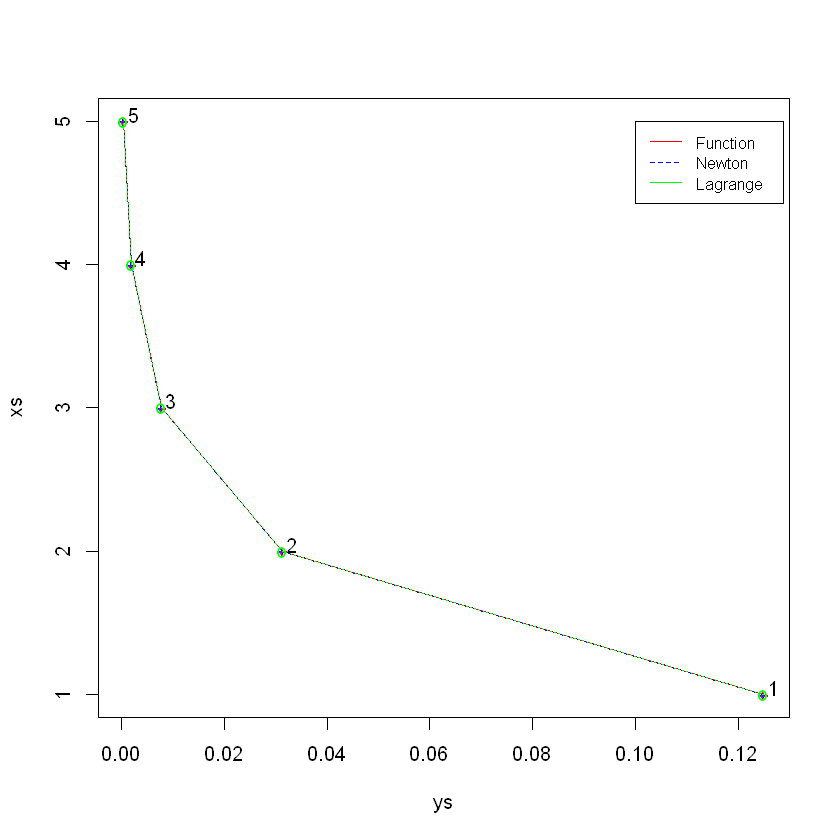

In [92]:
cat('\n ------For 5 values------\n',xs)
cat('\n Value of function \n',ys)
cat('\n Newton value \n',nwt)
cat('\n Lagrange value \n',lgj)

cat("\n Building graph for 5 values")
plot(ys,xs,type="o", col="red", pch="+", )

points(nwt,xs, col='blue', pch="*")
lines(nwt,xs, col='blue',lty=2)

points(lgj,xs, col='green',pch="o")
lines(lgj,xs, col='green', lty=3)

legend(0.1,5, legend=c("Function", "Newton", "Lagrange"), col=c("red","blue","green"), lty=1:2, cex=0.8)
text(ys+0.002,xs+0.05,xs)

Виводимо тепер значення поліномів та функції у точках з 1 до 5.5 та кроком 0.5 та графік


 ------For 9 values-----
 1 1.5 2 2.5 3 3.5 4 4.5 5
 Value of function 
 0.125 0.0625 0.03125 0.015625 0.0078125 0.00390625 0.001953125 0.0009765625 0.0004882812
 Newton value 
 0.125 0.06449509 0.03125 0.01496506 0.0078125 0.004436493 0.001953125 -4.95911e-05 0.0004882812
 Lagrange value 
 0.125 0.06449509 0.03125 0.01496506 0.0078125 0.004436493 0.001953125 -4.959106e-05 0.0004882812
 Building graph for 9 values

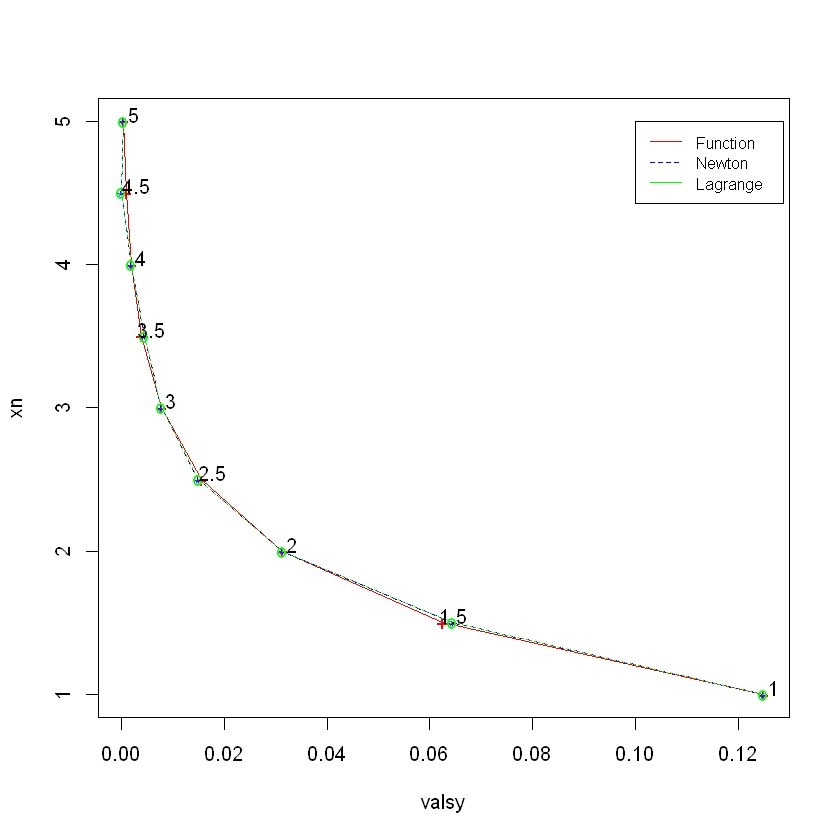

In [93]:
cat('\n ------For 9 values-----\n',xn)
cat('\n Value of function \n',valsy)
cat('\n Newton value \n',newval)
cat('\n Lagrange value \n',lagval)

cat("\n Building graph for 9 values")
plot(valsy,xn,type="o", col="red", pch="+", )

points(newval,xn, col='blue', pch="*")
lines(newval,xn, col='blue',lty=2)

points(lagval,xn, col='green',pch="o")
lines(lagval,xn, col='green', lty=3)

legend(0.1,5, legend=c("Function", "Newton", "Lagrange"), col=c("red","blue","green"), lty=1:2, cex=0.8)
text(valsy+0.002,xn+0.05,xn)

## Тепер обираємо довільні точки 3.2 та 6. Перша належить нашому проміжку, інша ні. Подивимося на результат.

In [94]:
dots_for_6 <- c(3.2,6)
voffd <- sapply(dots_for_6,func)
newfd <- sapply(dots_for_6,function(val) round(sum(fornewys[1],sapply(2:n, function(i) funsN(i,fornewys[i], val))),10))
lagrfd <- sapply(dots_for_6, function (x) Lagr(x))

cat("\n Value of function for choosen dots 3.2 and 6\n", voffd,
    "\n Newton for 3.2 and 6 \n", newfd, "\n Lagrange for 3.2 and 6\n", lagrfd)



 Value of function for choosen dots 3.2 and 6
 0.005920768 0.0001220703 
 Newton for 3.2 and 6 
 0.006225781 0.02978516 
 Lagrange for 3.2 and 6
 0.006225781 0.02978516